<p style="text-align:center; font-size:300%; line-height:300%; font-weight:bold; background-color:#2F52A3; color:white">Approximation</p>

<div style="font-weight:bold; background-color:#61C3CE">
    Evaluation :
    <ul>
        <li>Calculer à la main un développement limité</li>
        <li>Résoudre un problème de moindres carrés</li>
    </ul>
</div>

**Recommandations :**

+ Respectez rigoureusement l'interface des fonctions, et les consignes.
+ Copiez-collez le code de votre fonction (ne contenant aucun print ou autre effet de bord)
+ Utilisez les alias définis ci-dessous.
+ Même si vous travaillez à plusieurs, faites un dépôt par personne.
+ Il n'y aura aucune "démo" dans les cinq dernières minutes. Ce travail et les tests Moodle seront pris en compte dans la note finale.

**Objectifs :**

+ Approximer localement une fonction à l'aide d'un développement limité
+ Utiliser la méthode des moindres carrés et mesurer sa pertinence


In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.misc import derivative
import numpy as np
import math

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#AD84AD">Pour aller plus loin :</p>

Les paragraphes "pour aller plus loin" sont à traiter en seconde lecture, après avoir fini tous les autres points

<p style="font-size:200%; line-height:200%; font-weight:bold; background-color:#2F52A3; color:white">Approximation locale : Développements limités</p>

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Théorie</p>

**Théorème de Taylor-Young :** Soit $f$ une fonction $n$ fois dérivable en $a$, alors 

$$f(x) = f(a) + \frac{f'(a)}{1!} (x-a)^1 + \frac{f''(a)}{2!} (x-a)^2 + \frac{f^{(3)}(a)}{3!} (x-a)^3 
+ \cdots + \frac{f^{(k)}(a)}{k!} (x-a)^k + \cdots + \frac{f^{(n)}(a)}{n!} (x-a)^n + o ((x-a)^n) $$

In [11]:
# En Python, la factorielle peut se calculer de la manière suivante :

print(math.factorial(3))

6


<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Explication</p>

Dans la formule de Taylor-Young, on peut identifier deux parties :

$$ P_{f,a,n}(x) = f(a) + \frac{f'(a)}{1!} (x-a)^1 + \frac{f''(a)}{2!} (x-a)^2 + \frac{f^{(3)}(a)}{3!} (x-a)^3 
+ \cdots + \frac{f^{(k)}(a)}{k!} (x-a)^k + \cdots + \frac{f^{(n)}(a)}{n!} (x-a)^n$$
et
$$o ((x-a)^n)$$

**Définition :** La partie polynômiale du développement limité de $f$ en $a$ à l'ordre $n$ est le polynôme  $P_{f,a,n}$.

+ Lorsque $x$ est proche de $a$, la quantité $o ((x-a)^n)$ est négligeable par rapport à $P_{f,a,n}(x)$.
+ La partie polynômiale du développement limité constitue donc une approximation locale de $f$ en $a$.

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de CM</p>

Utilisez la formule de Taylor-Young pour retrouver les développements limités suivant :

+ En $a = 0$ à l'ordre $3$, $\displaystyle\sin (x) = x - \frac{x^3}{6} + o (x^3)$
+ En $a = 0$ à l'ordre $3$, $\displaystyle\sqrt{1+x} = 1 + \frac{x}{2} - \frac{x^2}{8} + \frac{x^3}{16} + o (x^4)$
+ En $a = 1$ à l'ordre $5$, $\displaystyle\ln (x) = (x-1) - \frac{1}{2}(x-1)^2 + \frac{1}{3}(x-1)^3 - \frac{1}{4}(x-1)^4 + \frac{1}{5}(x-1)^5 + o ((x-1)^5)$
+ En $a = 1$ à l'ordre $4$, $\displaystyle\exp(x) = e + e(x-1) + \frac{e}{2}(x-1)^2 + + \frac{e}{6}(x-1)^3 + \frac{e}{24}(x-1)^4 + o ((x-1)^4)$

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Représentations graphiques</p>

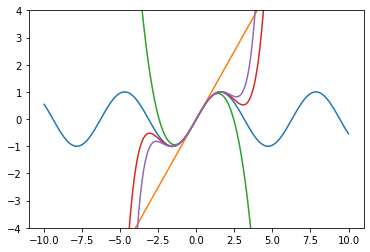

In [12]:
#x = np.linspace(-4,4,200)
x = np.linspace(-10,10,200) #cm
f = np.sin(x) # La fonction à approximer
dl1 = x # La partie polynomiale du DL en a = 0 à l'ordre n = 1
dl3 = x - x**3/6 # La partie polynomiale du DL en a = 0 à l'ordre n = 3
dl5= x - x**3/6 + x**5/120 #cm
dl7= x - x**3/6 + x**5/120 + x**7/5040#cm

plt.plot(x,f)
plt.plot(x,dl1)
plt.plot(x,dl3)
plt.plot(x,dl5)#cm
plt.plot(x,dl7)#cm

plt.ylim(-4,4)#cm
plt.show()

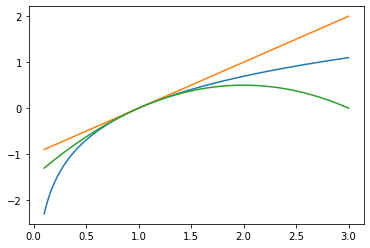

In [13]:
x = np.linspace(0.1,3,200)
f = np.log(x) # La fonction à approximer (ATTENTION log en Python est ln en Mathématiques)
dl1 = (x-1) # La partie polynomiale du DL en a = 1 à l'ordre n = 1
dl2 = (x-1) -(x-1)**2/2 # La partie polynomiale du DL en a = 1 à l'ordre n = 2

plt.plot(x,f)
plt.plot(x,dl1)
plt.plot(x,dl2)

plt.show()

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP</p>

+ Ecrivez une fonction `DL(f,a,n)` qui retourne la **fonction** définie par la partie polynômiale du développement limité de $f$ en $a$ à l'ordre $n$.
+ Tracez sur un même graphique, la fonction et quelques approximations obtenues comme partie polynomiales de DL. Vous utiliserez la fonction $f$ définie par $f(x) = e^{-\frac{x}{4}} \sin(4x)$ et vous représenterez avec cette fonction, les parties polynomiales des développements limités de $f$ en 

**Indication :** Si $f : x \mapsto \sin (x)$ est la fonction sinus, $a = 0$ et $n = 3$, votre fonction `DL(f,a,n)` doit retourner, la **fonction** $x \mapsto x - \frac{x^3}{6}$.

**Appelez l'enseignant pour qu'il valide votre graphique.**

**Remarque :** Pas de dépôt Moodle pour la fonction `DL(f,a,n)` car la fonction `scipy.misc.derivative` est très instable numériquement et rend les tests unitaires très peu fiables.

In [6]:
# Insérez votre code

<p style="font-size:200%; line-height:200%; font-weight:bold; background-color:#2F52A3; color:white">Approximation globale : les moindres carrés</p>

**Remarque :** Les slides "théoriques" donnent un peu plus d'explications.

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Droite de régression</p>

+ On dispose d'une famille de points $X = \lbrack x_1,\ldots,x_n\rbrack$, $Y = \lbrack y_1,\ldots,y_n\rbrack$ et l'on cherche une droite **qui passe au plus près** de ce nuage de points.
+ Autrement dit, on cherche $a$ et $b$ de sorte que la droite d'équation $y = ax+b$ **approxime au mieux** le nuage.
+ L'erreur d'approximation est calculée par la formule suivante :

$$E(a,b) = \sum_{k=1}^n (y_i - ax_i -b)^2$$

+ Ainsi pour une famille de points donnée, on cherche $(a,b)$ un minimum de $E$ (traduction mathématiquement rigoureuse de **approxime au mieux**).

**Remarque :** L'erreur $E$ est une somme d'écarts au carré, d'où le nom de la méthode.

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Données</p>

Il s'agit de données "célèbres" qui seront utilisées pour vos exercices de TP.

<table style="text-align: center; margin-left:auto; margin-right:auto;" border="1">
<caption>Quartet d'Anscombe
</caption>
<tbody><tr>
<th colspan="2">I
</th>
<th colspan="2">II
</th>
<th colspan="2">III
</th>
<th colspan="2">IV
</th></tr>
<tr>
<td><i>x</i>
</td>
<td><i>y</i>
</td>
<td><i>x</i>
</td>
<td><i>y</i>
</td>
<td><i>x</i>
</td>
<td><i>y</i>
</td>
<td><i>x</i>
</td>
<td><i>y</i>
</td></tr>
<tr>
<td>10,0</td>
<td>8,04</td>
<td>10,0</td>
<td>9,14</td>
<td>10,0</td>
<td>7,46</td>
<td>8,0</td>
<td>6,58
</td></tr>
<tr>
<td>8,0</td>
<td>6,95</td>
<td>8,0</td>
<td>8,14</td>
<td>8,0</td>
<td>6,77</td>
<td>8,0</td>
<td>5,76
</td></tr>
<tr>
<td>13,0</td>
<td>7,58</td>
<td>13,0</td>
<td>8,74</td>
<td>13,0</td>
<td>12,74</td>
<td>8,0</td>
<td>7,71
</td></tr>
<tr>
<td>9,0</td>
<td>8,81</td>
<td>9,0</td>
<td>8,77</td>
<td>9,0</td>
<td>7,11</td>
<td>8,0</td>
<td>8,84
</td></tr>
<tr>
<td>11,0</td>
<td>8,33</td>
<td>11,0</td>
<td>9,26</td>
<td>11,0</td>
<td>7,81</td>
<td>8,0</td>
<td>8,47
</td></tr>
<tr>
<td>14,0</td>
<td>9,96</td>
<td>14,0</td>
<td>8,10</td>
<td>14,0</td>
<td>8,84</td>
<td>8,0</td>
<td>7,04
</td></tr>
<tr>
<td>6,0</td>
<td>7,24</td>
<td>6,0</td>
<td>6,13</td>
<td>6,0</td>
<td>6,08</td>
<td>8,0</td>
<td>5,25
</td></tr>
<tr>
<td>4,0</td>
<td>4,26</td>
<td>4,0</td>
<td>3,10</td>
<td>4,0</td>
<td>5,39</td>
<td>19,0</td>
<td>12,50
</td></tr>
<tr>
<td>12,0</td>
<td>10,84</td>
<td>12,0</td>
<td>9,13</td>
<td>12,0</td>
<td>8,15</td>
<td>8,0</td>
<td>5,56
</td></tr>
<tr>
<td>7,0</td>
<td>4,82</td>
<td>7,0</td>
<td>7,26</td>
<td>7,0</td>
<td>6,42</td>
<td>8,0</td>
<td>7,91
</td></tr>
<tr>
<td>5,0</td>
<td>5,68</td>
<td>5,0</td>
<td>4,74</td>
<td>5,0</td>
<td>5,73</td>
<td>8,0</td>
<td>6,89
</td></tr></tbody></table>

[8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]


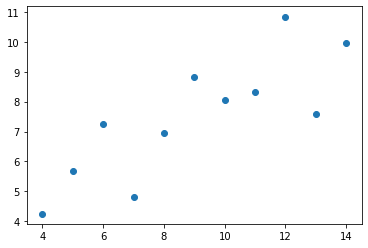

In [14]:
X1 = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
Y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

X2 = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
Y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]

X3 = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
Y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]

X4 = [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0]
Y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

plt.scatter(X1,Y1)
print(Y1)

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Calcul pratique</p>

+ On forme la matrice $A$ dont la première colonne contient tous les abscisses $X$ et la seconde ne contient que des $1$ :

$$ A = \left(\begin{matrix}
x_1 & 1 \\ 
x_2 & 1 \\ 
\vdots & \vdots \\ 
x_n & 1
\end{matrix}
\right)$$

+ Les coefficients $a$ et $b$ doivent être solutions du système linéaire :

$$ ~^tA A \left(
\begin{matrix}
a \\ b
\end{matrix}
\right) = ~^tA ~^tY$$

où $~^tY$ désigne le vecteur colonne contenant toutes les ordonnées. C'est une condition nécessaire.

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de CM</p>

En utilisant les formules ci-dessus, déterminer l'équation réduite de la droite d'ajustement par les moindres carrés pour les points :

$$I(1;1),\, J(2;3),\, K(3;2)$$

+ Ecrivez la matrice $A$ correspondant à cette situation.
+ Calculez $~^tA \, A$ et $~^tA \, Y$
+ Résolvez le système linéaire $2 \times 2$ d'inconnues $a$ et $b$ :

$$ ~^tA A \left(
\begin{matrix}
a \\ b
\end{matrix}
\right) = ~^tA ~^tY$$

**Réponse :** L'équation est $y = \frac{1}{2}x + 1$

<function matplotlib.pyplot.show(*args, **kw)>

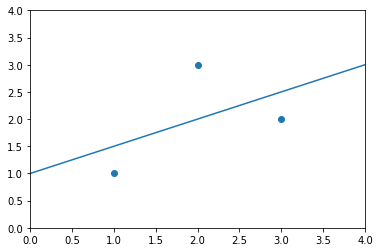

In [16]:
X = [1,2,3]
Y = [1,3,2]

x = np.linspace(0,4, 3)
y = 1/2*x + 1

plt.plot(x,y)
plt.scatter(X,Y)
plt.xlim(0,4)
plt.ylim(0,4)
plt.show

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Rappels `numpy`</p>

In [8]:
# Quelques tableaux

Z = np.zeros((2,3)) # Matrice nulle
print(Z)
O = np.ones((4,2)) # Matrice remplie de un
print(O)
tO = np.transpose(O) # Transposée = échange de lignes et de colonnes
print(tO)

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP : Fonction sur l'étagère</p>

**Dans cet exercice, vous utiliserez le premier jeu du quartet d'Anscombe.**

+ Consultez la documentation de la fonction `np.linalg.lstsq`
+ A l'aide de cette fonction, determinez une équation de la droite d'approximation au sens des moindres carrés pour le jeu de données
+ Représentez sur un même graphique, le nuage de points et la droite.

**Appelez l'enseignant pour qu'il valide votre graphique.**

In [2]:
# Insérez votre code

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP</p>

+ Ecrivez une fonction `dte(X,Y)` qui retourne les coefficients $a$ et $b$ de la droite d'ajustement au sens des moindres carrés, dans un `np.array` $\lbrack a,b \rbrack$.
+ **Attention :** $X$ et $Y$ doivent être des listes (`X = [...]` et non pas `X = np.array([...])`).
+ **Interdiction d'utiliser `lstsq` pour cet exercice**
+ Vous pourrez résoudre le système linéaire ci-dessus avec `solve`

**Déposez votre fonction `dte(X,Y)` sur Moodle avant la fin de la semaine**

In [3]:
# Insérez votre code

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Pertinence du modèle</p>

Un moyen simple d'évaluer si une droite est pertinente pour approximer un nuage de points est de calculer le coefficient de corrélation entre $X$ et $Y$ donné par la formule :

$$r = \displaystyle\hbox{corr} (X,Y) = \frac{\sum (x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum (x_i - \overline{x})^2} \sqrt{\sum (y_i - \overline{y})^2}}$$

Si $|\hbox{corr} (X,Y)| \geq 0.9$, alors la corrélation est excellente et le modèle est pertinent.

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de CM</p>

En utilisant la formule ci-dessus, calculez le coefficient de corrélation du nuage de points : 

$$I(1;1),\, J(2;3),\, K(3;2)$$

**Réponse :** $r = \frac{1}{2}$

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP : Fonction sur l'étagère</p>

+ Recherchez dans la documentation de `numpy` une fonction permettant de calculer ce coefficient de corrélation (pour les $4$ jeux de données).
+ Pour chacun des quatre jeux du quartet d'Anscombe, calculer le coefficient de corrélation.
+ Représentez sur quatre graphiques, les quatre nuages de points avec leur droite.
+ Méditez !

**Faites le Test "Coefficients de corrélations" sur Moodle avant la fin de la semaine** (ce test demande les coefficients de corrélation des $4$ jeux de données)

In [4]:
# Insérez votre code

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Généralisation : approximation polynomiale</p>


+ On peut cherche la parabole d'équation $y = ax^2 + bx + c$ qui passe au plus près de notre nuage. 
+ Les coefficients $a,b,c$ sont solution du même système linéaire où la matrice $A$ est :

$$ A = \left(
\begin{matrix}
x_1^2 & x_1 & 1 \\ 
x_2^2 & x_2 & 1 \\ 
\vdots & \vdots & \vdots \\
x_n^2 & x_n & 1
\end{matrix}
\right)$$

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#AD84AD">Pour aller plus loin :</p>

+ On peut généraliser au degré $p$ quelconque ($p = 2$ : cas de la droite déjà traité, $p = 3$ : cas de la parabole ci-dessus)
+ Que se passe-t-il pour $p=n$ ?
+ Et pour $p > n$ ?

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP</p>

**Pour tester votre fonction, utilisez le quartet d'Anscombe**

+ Codez une fonction `VDM(X,p)` qui retourne la matrice $A$ ci-dessus, du système à résoudre.
+ Codez une fonction `poly(X,Y,p)` qui retourne les coefficients polynôme $a_{p-1}x^{p-1} + \ldots + a_0$ d'approximation au sens des moindres carrés.
+ Sur un même graphique, visualisez le nuage de points et plusieurs polynômes d'approximation en faisant varier le degré.
+ **Attention :** $X$ et $Y$ doivent être des listes, comme pour la fonction `dte(X,Y)`.
+ **Attention :** `poly(X,Y,p)` retourne des **coefficients**, pas une fonction.

**Appelez l'enseignant pour qu'il valide votre graphique : vous utiliserez le jeu III et votre graphique fera apparaitre le nuage de points, la droite d'approximation et la parabole**

**Déposez vos fonctions `VDM(X,Y)` et `poly(X,Y,p)` sur Moodle avant la fin de la semaine**

In [5]:
# Insérez votre code

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#D67D3A">Attention : </p>

+ Pour le TP05, pendant la séance, vous avez $3$ exercices à montrer : le graphique de développements limités, le graphique d'utilisation de `lstsq` avec le jeu I, le graphique d'approximation avec entre autres la parabole et utilisant le jeu III.
+ Pour le TP05, avant la fin de semaine, vous avez $3$ fonctions à déposer : `dte(X,Y)`, `VDM(X,Y)` et `poly(X,Y,p)`.
+ Pour le TP05, avant la fin de semaine, vous avez également le test "Coefficients de corrélations" à effectuer.
+ Lors de l'évaluation sur feuille, il vous sera demandé de calculer "à la main", des développements limités et des droites d'approximations au sens des moindres carrés.